## FACTORS THAT AFFECT THE OUTCOME LENDERS YIELD

### Investigation Overview

 The focus of my investigation is on what factors affect the outcome of Lenders Yield. I would like to know what factors affects the return I get from my investment with prosper loans. It is the wish of every investor to get maximum value for their investment. This analysis explores and finds those factors(they are by no means exhaustive). I investigate the relationship between Lenders yield and other variables such as Prosper score, Borrower rate, Income Range, Home ownership and Loan terms among others to gain further insight on how they affect the final outcome of lenders yield.

### Dataset Overview
The Loan data set from Prosper contains 113,937 loans with 81 variables on each loan. It includes Current loans delinquencies as of 2014, Income range, loan terms, borrower rate, Prosper scores and Lenders yield among others. All in all I explored 17 parts of the data set.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style('darkgrid')
sb.set_palette("bright", 10)
%matplotlib inline

In [2]:
# Read prosper csv file
prosper = pd.read_csv('prosperLoanData (1).csv')


### Distribution of Lender Yield

As a lender you should know that most Lender Yield is between 0.04 and 0.34%!

Bins are set at 0.01 and the distribution is unimodal. Most of the Lender yield values are concentrated from 0.08 and 0.2. There is also another lower concentration between 0.2 and 0.3. A Lender yield rate a little above 0.3(0.3077) has the highest values.

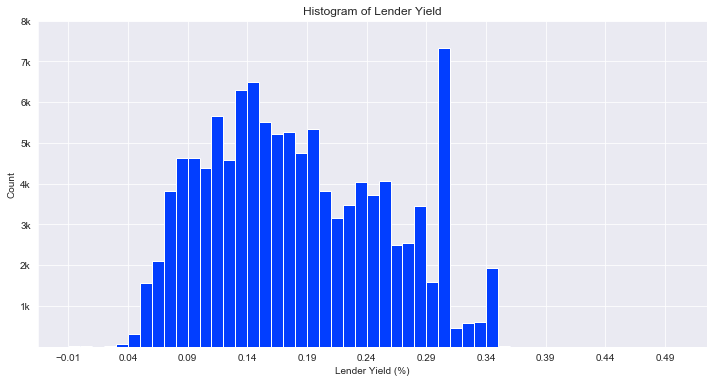

In [3]:
# Plot histogram of Lender yield to see distribution
plt.figure(figsize = [12, 6])
bins = np.arange(-0.01, 0.5+0.01, 0.01)
plt.xticks(np.arange(-0.01, 0.5+0.01, step=0.05))
plt.yticks([1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000], ['1k', '2k', '3k', '4k', '5k', '6k', '7k', '8k'])
plt.ylim(0, 8000)
plt.hist(data = prosper, x = 'LenderYield', bins=bins)
plt.xlabel('Lender Yield (%)')
plt.ylabel('Count')
plt.title('Histogram of Lender Yield');

### Bivariate Analysis

### Lender Yield by Prosper Score
- The box plot shows the relationship between the Lender Yield and Prosper score

- The lower the Prosper Score the higher the Lenders Yield and the higher the Prosper score the lower the yield. Riskier loans have higher lender yields. If you can stomach the risk associated with lower prosper score there is an opportunity to get higher yield

**Note**
- The Prosper score is a custom risk score built using historical Prosper data measure loan risk. 10 being the best and 1 being the worst

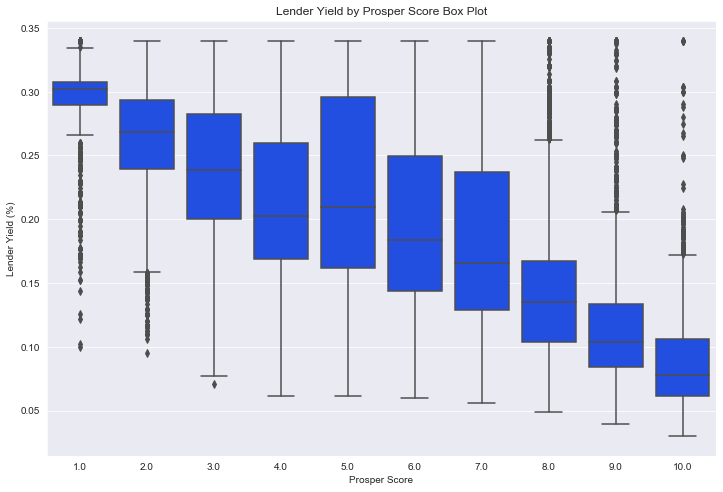

In [4]:
#The prosper score is rated between 1 - 10. Remove all that dont fall into that category
prosper = prosper.query('ProsperScore <= 10')

# Convert prosper score to categorical type
prosper.ProsperScore = prosper.ProsperScore.astype('category')

# Prosper score and Lender Yield
plt.figure(figsize = [12, 8])
base_color = sb.color_palette()[0]
sb.boxplot(data = prosper, x = 'ProsperScore', y = 'LenderYield', color = base_color)
plt.title('Lender Yield by Prosper Score Box Plot')
plt.xlabel('Prosper Score')
plt.ylabel('Lender Yield (%)');

### Borrower Rate vs Lender Yield

- The relationship is straight up linear
- The plot shows a strong positive relationship where lender yield increases with borrower rate increase. As the borrower rate increased, the Lender yield increased


**Note**
- Borrower Rate is the Borrowers interest rate for the loan

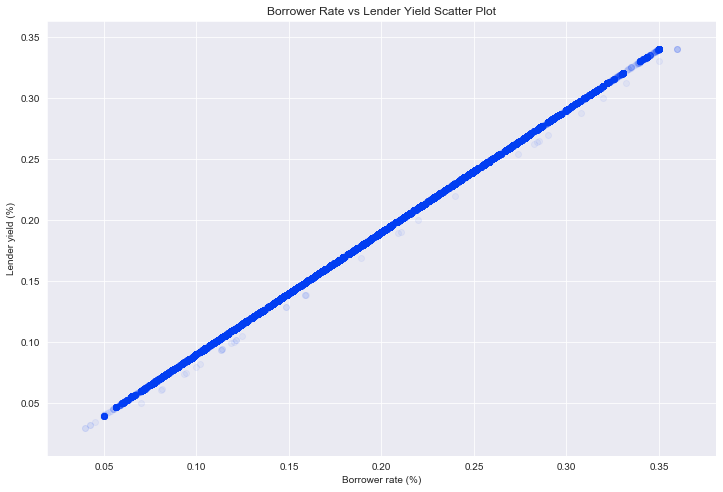

In [5]:
# Relationship between Borrower rate  and Lender yield

plt.figure(figsize = [12, 8])
plt.scatter(data=prosper, x='BorrowerRate', y='LenderYield', alpha=1/20);
plt.xlabel('Borrower rate (%)')
plt.ylabel('Lender yield (%)')
plt.title('Borrower Rate vs Lender Yield Scatter Plot');



### Lenders Yield and Income Range

- The Lender yield decreases as the income range increases. The safety of higher earnings affects lender yields

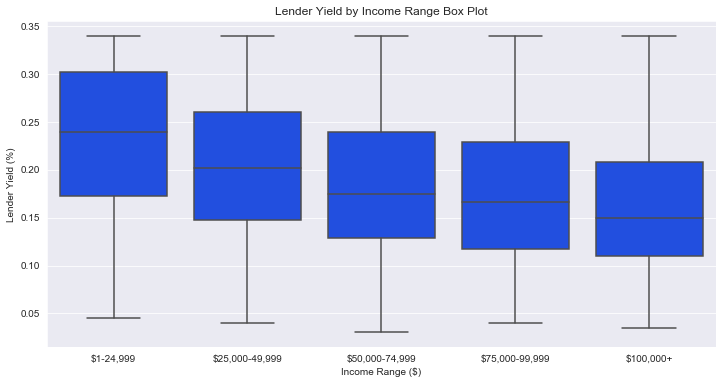

In [6]:
# Convert income range column to categorical type
level_order = ['$1-24,999','$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']
ord_cat = pd.api.types.CategoricalDtype(ordered=True, categories=level_order)
prosper.IncomeRange = prosper.IncomeRange.astype(ord_cat)

# Lets take a look at lenders yield and Original Loan amount
plt.figure(figsize = [12, 6])
base_color = sb.color_palette()[0]
sb.boxplot(data = prosper, x = 'IncomeRange', y = 'LenderYield', color = base_color)
plt.xticks(rotation=0)
plt.xlabel('Income Range ($)')
plt.ylabel('Lender Yield (%)')
plt.title('Lender Yield by Income Range Box Plot');

### Lenders Yield and Original Loan Amount

- Most loan values are concentrated below 15k. The higher loans also have a lower yield than the smaller loans


**Note**
- Loan Original amount is the Origination amount of the loan

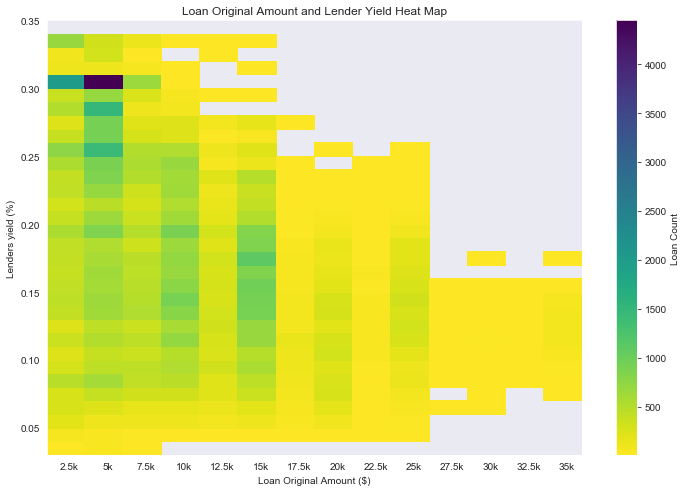

In [7]:
# Lets take a look at lenders yield and Original Loan amount
plt.figure(figsize = [12, 8])
bins_x = np.arange(1000, 35000+2500, 2500)
bins_y = np.arange(0.03, 0.34+0.01, 0.01)
plt.yticks(np.arange(0, 0.34+0.05, step=0.05))
plt.xticks([2500, 5000, 7500, 10000, 12500, 15000, 17500, 20000, 22500, 25000, 27500, 30000, 32500, 35000, 37500], 
           ['2.5k', '5k', '7.5k', '10k', '12.5k', '15k', '17.5k', '20k', '22.5k', '25k', '27.5k', '30k', '32.5k', '35k', '37.5k'])
plt.hist2d(data = prosper, x = 'LoanOriginalAmount', y = 'LenderYield',
           bins = [bins_x, bins_y], cmap = 'viridis_r', cmin = 0.5)
plt.xlabel('Loan Original Amount ($)') 
plt.ylabel('Lenders yield (%)')
plt.title('Loan Original Amount and Lender Yield Heat Map')
plt.colorbar(label = 'Loan Count');

### Multivariate Analysis

### Prosper score and Lender yield by Term

- For Prosper scores bewteen 7 to 10, the best average yields are for those loans that are 60 months term. The majority of the outliers are also on the upside. 
- For prosper scores 2, 3, 5 and 6, loans with 36 months tenure have better yields. Most of the outliers are on the lower side.  
- Its only Prosper score 4 that has the best yield on 12 month loans. 
- The lowest yields for most Prosper scores are the shorter term loan of 12 months.

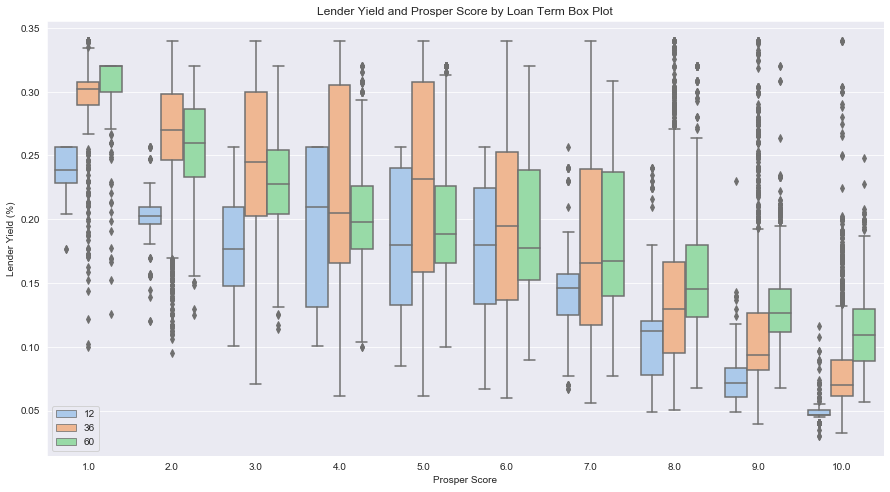

In [8]:
# Prosper score and Lender yield by Term
plt.figure(figsize = [15, 8])
#base_color = sb.color_palette()[1]
sb.boxplot(data = prosper, x = 'ProsperScore', y = 'LenderYield', hue= 'Term', palette = 'pastel')
plt.xticks(rotation=0)
plt.legend(loc=0);
plt.xlabel('Prosper Score')
plt.ylabel('Lender Yield (%)')
plt.title('Lender Yield and Prosper Score by Loan Term Box Plot');

### Prosper score and lender yield by Homeownership

- For every prosper score the average Lender yield is lower for homeowners. The only exception is the prosper score 1 where the homeowner loan has a higher average yield than the borrower without a home.

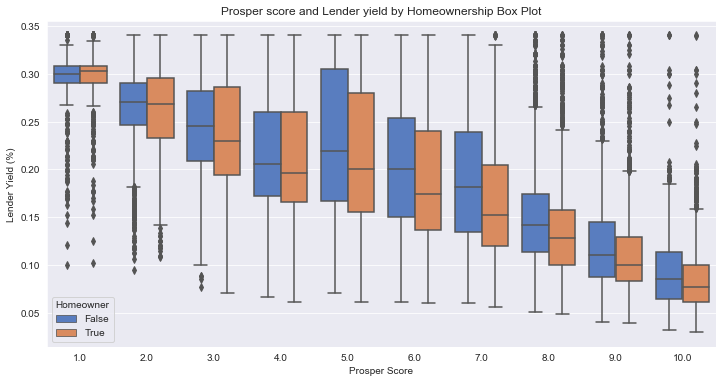

In [9]:
# Prosper score and lender yield by Is borrower a homeowner
plt.figure(figsize = [12, 6])
base_color = sb.color_palette()[0]
sb.boxplot(data = prosper, x = 'ProsperScore', y = 'LenderYield', hue= 'IsBorrowerHomeowner', palette = 'muted')
plt.xticks(rotation=0)
plt.xlabel('Prosper Score')
plt.ylabel('Lender Yield (%)')
plt.title('Prosper score and Lender yield by Homeownership Box Plot')
plt.legend(title = 'Homeowner', loc=0);

### Prosper score and lender yield by Currently in group

- For prosper score of 2 to 7, lenders yield is higher when the borrower is in a group. 
- This is however different for all other prosper scores where those not in a group offer better yields for the lender.

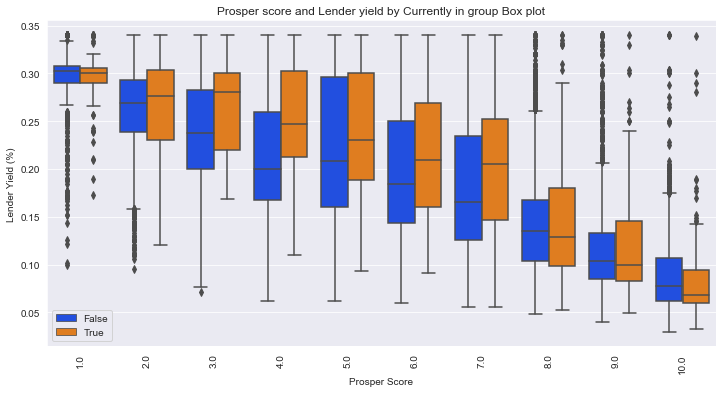

In [10]:
# Prosper score and lender yield by Currently in group
plt.figure(figsize = [12, 6])
base_color = sb.color_palette()[0]
sb.boxplot(data = prosper, x = 'ProsperScore', y = 'LenderYield', hue= 'CurrentlyInGroup')
plt.xticks(rotation=90)
plt.legend(loc=0)
plt.xlabel('Prosper Score')
plt.ylabel('Lender Yield (%)')
plt.title('Prosper score and Lender yield by Currently in group Box plot');

### Lender Yield and Estimated Return by Month/Year

- From the line chart the Lenders Yield is always higher than the estimated return for all the years plotted
- They also follow a similar pattern

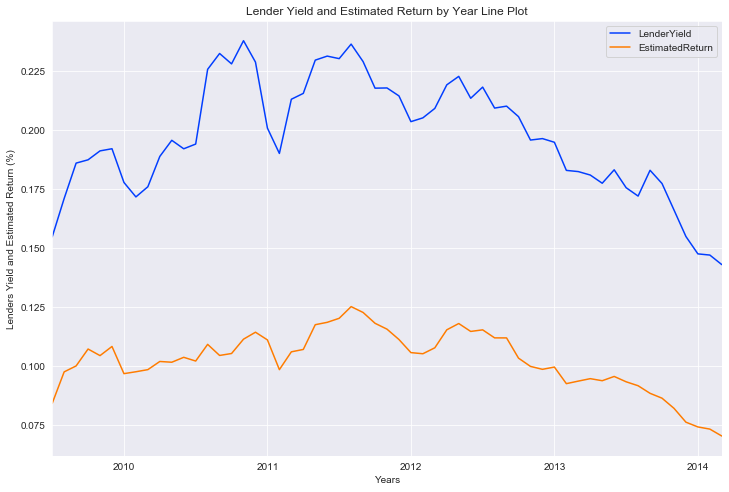

In [11]:
#Convert Listing creation date to datetime
prosper.ListingCreationDate =  pd.to_datetime(prosper['ListingCreationDate'])

# Lets get average monthly Estimated return
month_return = prosper.groupby(pd.Grouper(key='ListingCreationDate', freq='M')).mean().EstimatedReturn
month_yield = prosper.groupby(pd.Grouper(key='ListingCreationDate', freq='M')).mean().LenderYield

# Plot line chart for Yield and Estimated Return by Month/Year
plt.figure(figsize=(12, 8)) 
month_yield.plot(kind='line')
month_return.plot(kind='line')
plt.xlabel('Years')
plt.ylabel('Lenders Yield and Estimated Return (%)')
plt.legend();
plt.title('Lender Yield and Estimated Return by Year Line Plot');

### Summary

- As a lender you should know that most Lenders Yield is between 0.04 and 0.34%!
- The lower the Prosper Score the higher the Lenders Yield and the higher the Prosper score the lower the yield. Riskier loans have higher lender yields. If you can stomach the risk associated with lower prosper score their is an opportunity to get higher yield
- Borrowers with higher interest rates offer better yields and vice versa
- The Lender yield decreases as the income range increases. The safety of higher earnings affects lender yields
- Most loan values are concentrated below 15k. The higher loans also have a lower yield than the smaller loans
- The lowest yields for most Prosper scores are the shorter term loan of 12 months
- For most Prosper scores, the average Lender yield is lower for homeowners
- From the line chart the Lenders Yield is always higher than the estimated return for all the years plotted



In [12]:
!jupyter nbconvert prosper_slide_deck.ipynb --to slides --post serve --template output-toggle.tpl

[NbConvertApp] Converting notebook prosper_slide_deck.ipynb to slides
[NbConvertApp] Writing 595368 bytes to prosper_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\max\Anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\max\Anaconda3\lib\site-packages\jupyter_core\application.py", line 267, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\max\Anaconda3\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Users\max\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 340, in start
    self.convert_notebooks()
  File "C:\Users\max\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 510, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "C:\Users\m